In [ ]:
#A telecommunications company is concerned about the number of customers leaving their land-line business for 
#cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and 
#you have to find out who is leaving and why.

In [17]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#We will use a telecommunications dataset for predicting customer churn. This is a historical customer 
#dataset where each row represents one customer. The data is relatively easy to understand, and you may 
#uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire 
#new ones, so the focus of this analysis is to predict the customers who will stay with the company.
#his data set provides information to help you predict what behavior will help you to retain customers. 
#You can analyze all relevant customer data and develop focused customer retention programs.

##The dataset includes information about:

#Customers who left within the last month – the column is called Churn
#Services that each customer has signed up for – phone, multiple lines, internet, online security, 
#online backup, device protection, tech support, and streaming TV and movies
#Customer account information – how long they had been a customer, contract, payment method, 
#paperless billing, monthly charges, and total charges
#Demographic info about customers – gender, age range, and if they have partners and dependents
#Load the Telco Churn data
#Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts 
#to reduce turnover in its customer base. Each case corresponds to a separate customer and it records 
#various demographic and service usage information. Before you can work with the data, you must use the URL 
#to get the ChurnData.cs

In [3]:
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2020-02-26 16:15:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.30K  48.1KB/s    in 0.7s    

2020-02-26 16:15:34 (48.1 KB/s) - ‘ChurnData.csv’ saved [36144/36144]



In [4]:
df = pd.read_csv("ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
tenure      200 non-null float64
age         200 non-null float64
address     200 non-null float64
income      200 non-null float64
ed          200 non-null float64
employ      200 non-null float64
equip       200 non-null float64
callcard    200 non-null float64
wireless    200 non-null float64
longmon     200 non-null float64
tollmon     200 non-null float64
equipmon    200 non-null float64
cardmon     200 non-null float64
wiremon     200 non-null float64
longten     200 non-null float64
tollten     200 non-null float64
cardten     200 non-null float64
voice       200 non-null float64
pager       200 non-null float64
internet    200 non-null float64
callwait    200 non-null float64
confer      200 non-null float64
ebill       200 non-null float64
loglong     200 non-null float64
logtoll     200 non-null float64
lninc       200 non-null float64
custcat     200 non-null float64
chur

In [8]:
#Data Preprocessing and Selection
churn_df = df[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']]
churn_df[['churn']] = churn_df[['churn']].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [9]:
print(churn_df.shape)
print(churn_df.columns)

(200, 10)
Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')


In [69]:
X = np.asarray(churn_df[['tenure','age','address','income','ed','employ','equip']])
y = np.asarray(churn_df['churn'])
print(X[0:5])
print(y[0:5])


[[ 11.  33.   7. 136.   5.   5.   0.]
 [ 33.  33.  12.  33.   2.   0.   0.]
 [ 23.  30.   9.  30.   1.   2.   0.]
 [ 38.  35.   5.  76.   2.  10.   1.]
 [  7.  35.  14.  80.   2.  15.   0.]]
[1 1 0 0 0]


In [70]:
#Normalize Data
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

In [71]:
#train and test data set
train_X , test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 4)


In [72]:
#train set
print(train_X[0:5])
print(train_y[0:5])

[[ 1.09  0.14 -0.75  0.2  -0.64  1.32 -0.86]
 [ 0.86  0.06 -1.15 -0.16  0.92 -0.92  1.16]
 [ 0.95  0.91  1.12  0.19  1.7   0.42  1.16]
 [ 1.55  0.06  1.12 -0.44  0.14 -1.14  1.16]
 [ 1.41  0.68 -0.95  2.01  1.7   1.54 -0.86]]
[0 1 0 0 0]


In [73]:
#test_set
print(test_X[0:5])
print(test_y[0:5])

[[ 0.53 -0.09  0.43  0.4   0.92  0.2   1.16]
 [ 0.81 -0.63 -1.05 -0.12 -1.42 -0.47 -0.86]
 [-0.26 -1.01 -1.05 -0.43 -1.42 -0.25 -0.86]
 [ 0.76 -0.17 -0.56  0.34  0.14  0.87 -0.86]
 [-0.12 -0.63  0.03 -0.33 -0.64 -1.14 -0.86]]
[0 0 1 0 1]


In [74]:
#MODELING
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01 , solver='liblinear')
mod = LR.fit(train_X, train_y)
mod

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
yhat = LR.predict(test_X)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [76]:
#predict_proba returns estimates for all classes, ordered by the label of classes. 
#So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of 
#class 1, P(Y=1|X):

yhat_prob = LR.predict_proba(test_X)
yhat_prob[0:10]

array([[0.54, 0.46],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.61, 0.39],
       [0.41, 0.59],
       [0.63, 0.37]])

In [77]:
#Evaluation

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(test_y, yhat))


0.75


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [78]:
#Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,
                          normalize = False, 
                          title='Confusion Matrix', 
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by NOrmalize=True.
    """
    if normalize:
        cm  = cm.astype(float) / cm.sum(axis=1)[:,np.newaxis]
        print("Normalize Confusion Matrix")
    else:
        print("Confusion Matrix without mormalization")
        
    print(cm)    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(test_y, yhat, labels=[1,0]))
    

[[ 6  9]
 [ 1 24]]


Confusion Matrix without mormalization
[[ 6  9]
 [ 1 24]]


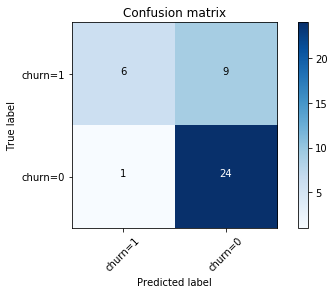

In [79]:
#Compute Confusion Matrix

cnf_matrix = confusion_matrix(test_y, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [80]:
print(classification_report(test_y, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [81]:
#log_loss
from sklearn.metrics import log_loss
log_loss(test_y,yhat_prob)

0.6017092478101185